![](olmpics.jpg)

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('olympics dataset.csv')
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [2]:
region_df=pd.read_csv('olympics_regions.csv')
region_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [3]:
df.shape

(271116, 15)

In [4]:
df=df[df['Season']=='Summer']
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

In [5]:
df=df.merge(region_df,on='NOC',how='left')

In [6]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [7]:
df['region'].unique().shape

(206,)

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [9]:
df.duplicated().sum()

1385

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df['Medal'].value_counts()#But here missing values are also present 

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [13]:
#Therefore this is done 
t=pd.get_dummies(df['Medal'])
t

Bronze   Gold  Silver
0        False  False   False
1        False  False   False
2        False  False   False
3        False   True   False
4        False  False   False
...        ...    ...     ...
222547   False  False   False
222548   False  False   False
222549   False  False   False
222550   False  False   False
222551   False  False   False

[221167 rows x 3 columns]

In [14]:
df.shape

(221167, 17)

In [15]:
#now adding this to the original data 
df=pd.concat ([df,t],axis=1)

In [16]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  Bronze   Gold  Silver  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False

In [17]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']]

Gold  Silver  Bronze
NOC                      
AFG     0       0       2
AHO     0       1       0
ALB     0       0       0
ALG     5       4       8
AND     0       0       0
..    ...     ...     ...
YEM     0       0       0
YMD     0       0       0
YUG   130     161      92
ZAM     0       1       1
ZIM    17       4       1

[230 rows x 3 columns]

In [18]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [19]:
#here there is a little mistake , although in reality USA has won only 1200 something golds 
#then too its showing 2400 something ....i.e. increased no. of of the exact amt of medals 
# this is just because of the presence of the duplicate rows in the data ....it is happening 
# that if USA has won 1 gold in hockey its counting 1 gold for each of the 11 players involved
#in the hockey ...thats the reason for the increase in the count of the gold .this can be 
#corrected by removing the duplicate rows present in many columns of the data..

In [20]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
#duplicates has been removed 
medal_tally

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  
222536       Poland   NaN   False  False   False  
222537       Poland   NaN   False  False   False  
222541       Greece   NaN   False  False   False  

[105636 rows x 20 columns]

In [21]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [22]:
medal_tally

NOC  Gold  Silver  Bronze
0    USA  1035     802     708
1    URS   394     317     294
2    GBR   278     317     300
3    GER   235     261     283
4    FRA   234     256     287
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [23]:
years=df['Year'].unique().tolist()

In [24]:
years.sort()
years.insert(0,'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [25]:
#printing names of all the countries involved in the olympics but it also contain nan values
#so we are dropping them
country=np.unique(df['region'].dropna().values).tolist()
country.sort()
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [26]:
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [27]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year =='Overall' and country =='Overall':
        temp_df=medal_df
    if year =='Overall' and country !='Overall':
        flag=1
        temp_df= medal_df[medal_df['region']==country]
    if year !='Overall' and country =='Overall':
        temp_df= medal_df[medal_df['Year']== int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df= medal_df[(medal_df['Year']== int(year))& (medal_df['region']== country)]
    if flag==1:    
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total']=x['Gold']+x['Silver']+x['Bronze']

    print(x)

In [28]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_df

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  
222536       Poland   NaN   False  False   False  
222537       Poland   NaN   False  False   False  
222541       Greece   NaN   False  False   False  

[105636 rows x 20 columns]

In [29]:
fetch_medal_tally(df,year='Overall',country='Overall')

            region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]


In [30]:
fetch_medal_tally(df,year='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [31]:
fetch_medal_tally(df,year='2016',country='India')

  region  Gold  Silver  Bronze  total
0  India     0       1       1      2


In [32]:
fetch_medal_tally(df,year='2016',country='Overall')

         region  Gold  Silver  Bronze  total
0           USA    46      37      38    121
1            UK    27      23      17     67
2         China    26      18      26     70
3        Russia    19      17      20     56
4       Germany    17      10      15     42
..          ...   ...     ...     ...    ...
198     Ireland     0       2       0      2
199      Israel     0       0       2      2
200    Kiribati     0       0       0      0
201  Kyrgyzstan     0       0       0      0
202    Zimbabwe     0       0       0      0

[203 rows x 5 columns]


In [33]:
df['Year'].unique().shape[0]-1

28

In [34]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [35]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [36]:
df['Event'].unique().shape

(651,)

In [37]:
df['Name'].unique().shape,df['Name'].unique()

((116122,),
 array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
        'James Francis "Jim" Zylker', 'Aleksandr Viktorovich Zyuzin',
        'Olga Igorevna Zyuzkova'], dtype=object))

In [38]:
df['region'].unique().shape

(206,)

In [39]:
df.drop_duplicates(['Year','region'])

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
198805  121320           Horatio Tertuliano Torrom   M   NaN     NaN     NaN   
203075  123858                 Lloyd Oscar Valberg   M  26.0     NaN     NaN   
209763  127894                 Bruno Julius Wagner   M  25.0   185.0    82.0   
215352  131186                     Antoni Wiwulski   M  35.0     NaN     NaN   
216735  132030                Mariana Dias Ximenes   F  24.0   151.0    48.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
198805       Argentina  ARG  1908 Summer  1908  Summer       London   
203075       Singapore  SGP  1948 Summer  1948  Summer       London   
209763     Switzerland  SUI  1908 Summer  1908  Summer       London   
215352          Poland  POL  1912 Summer  1912  Summer    Stockholm   
216735     Timor Leste  TLS  2008 Summer  2008  Summer      Beijing   

                   Sport                               Event Medal  \
0             Basketball         Basketball Men's Basketball   NaN   
1                   Judo        Judo Men's Extra-Lightweight   NaN   
2               Football             Football Men's Football   NaN   
3             Tug-Of-War         Tug-Of-War Men's Tug-Of-War  Gold   
4              Athletics        Athletics Women's 100 metres   NaN   
...                  ...                                 ...   ...   
198805    Figure Skating        Figure Skating Men's Singles   NaN   
203075         Athletics           Athletics Men's High Jump   NaN   
209763         Athletics        Athletics Men's Hammer Throw   NaN   
215352  Art Competitions  Art Competitions Mixed Sculpturing   NaN   
216735         Athletics          Athletics Women's Marathon   NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
198805    Argentina   NaN   False  False   False  
203075          NaN   NaN   False  False   False  
209763  Switzerland   NaN   False  False   False  
215352       Poland   NaN   False  False   False  
216735  Timor-Leste   NaN   False  False   False  

[2786 rows x 20 columns]

In [40]:
df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()

Year  count
0   2016    204
1   2012    203
2   2008    202
3   2004    200
4   2000    199
5   1996    196
6   1992    168
7   1988    156
8   1984    139
9   1972    120
10  1968    111
11  1964     93
12  1976     91
13  1960     83
14  1980     80
15  1956     71
16  1952     67
17  1948     59
18  1936     49
19  1932     47
20  1928     46
21  1924     45
22  1900     31
23  1920     29
24  1912     29
25  1908     22
26  1906     20
27  1904     14
28  1896     12

In [41]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('count')

In [42]:
nations_over_time.rename(columns={'count':'No. of Countries'},inplace=True)
nations_over_time

Year  No. of Countries
28  1896                12
27  1904                14
26  1906                20
25  1908                22
24  1912                29
23  1920                29
22  1900                31
21  1924                45
20  1928                46
19  1932                47
18  1936                49
17  1948                59
16  1952                67
15  1956                71
14  1980                80
13  1960                83
12  1976                91
11  1964                93
10  1968               111
9   1972               120
8   1984               139
7   1988               156
6   1992               168
5   1996               196
4   2000               199
3   2004               200
2   2008               202
1   2012               203
0   2016               204

In [43]:
import plotly.express as px

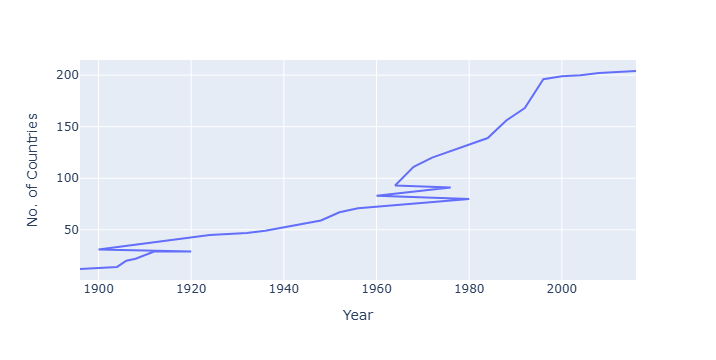

In [44]:
fig=px.line(nations_over_time,x="Year",y="No. of Countries")
fig.show()

In [45]:
events_over_time=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('count')

In [46]:
events_over_time.rename(columns={'count':'Total no. of Events'},inplace=True)
events_over_time

Year  Total no. of Events
28  1896                   43
27  1906                   74
26  1900                   90
25  1904                   95
24  1912                  107
23  1908                  109
22  1928                  122
21  1932                  131
20  1924                  131
19  1952                  149
18  1936                  150
17  1960                  150
16  1956                  151
15  1948                  153
14  1920                  158
13  1964                  163
12  1968                  172
11  1972                  193
10  1976                  198
9   1980                  203
8   1984                  221
7   1988                  237
6   1992                  257
5   1996                  271
4   2000                  300
3   2004                  301
2   2012                  302
1   2008                  302
0   2016                  306

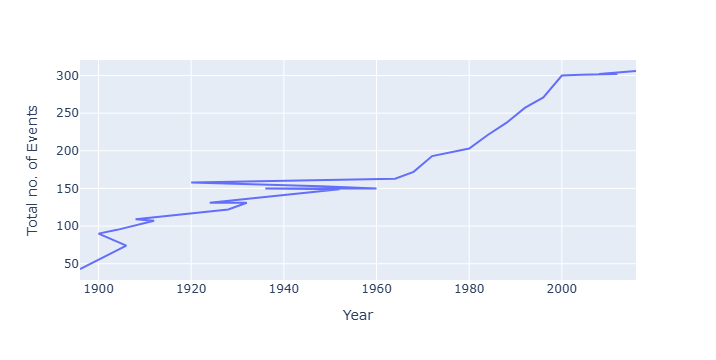

In [47]:
fig=px.line(events_over_time,x="Year",y="Total no. of Events")
fig.show()

In [48]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [49]:
athletes_over_time=df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('count')

In [50]:
athletes_over_time.rename(columns={'count':'Total athletes Participated'},inplace=True)

In [51]:
athletes_over_time

Year  Total athletes Participated
28  1896                          176
27  1904                          650
26  1906                          841
25  1900                         1220
24  1932                         1922
23  1908                         2024
22  1912                         2409
21  1920                         2675
20  1928                         3246
19  1924                         3256
18  1956                         3346
17  1948                         4402
16  1936                         4482
15  1952                         4931
14  1964                         5134
13  1980                         5252
12  1960                         5348
11  1968                         5552
10  1976                         6070
9   1984                         6791
8   1972                         7105
7   1988                         8443
6   1992                         9380
5   1996                        10324
4   2012                        10502
3   2004                        10537
2   2000                        10639
1   2008                        10880
0   2016                        11174

In [52]:
x=df.drop_duplicates(['Year','Sport','Event'])

In [53]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Alpinism                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Archery                 NaN   8.0   6.0   NaN   3.0   NaN  10.0   NaN   NaN   
Art Competitions        NaN   NaN   NaN   NaN   NaN   5.0   5.0   5.0  13.0   
Athletics              12.0  23.0  24.0  21.0  26.0  30.0  29.0  27.0  27.0   
Badminton               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Baseball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Basketball              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Basque Pelota           NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Beach Volleyball        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Boxing                  NaN   NaN   7.0   NaN   5.0   NaN   8.0   8.0   8.0   
Canoeing                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cricket                 NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Croquet                 NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cycling                 6.0   3.0   7.0   6.0   6.0   2.0   6.0   6.0   6.0   
Diving                  NaN   NaN   1.0   1.0   2.0   4.0   5.0   5.0   4.0   
Equestrianism           NaN   5.0   NaN   NaN   NaN   5.0   7.0   5.0   6.0   
Fencing                 3.0   7.0   5.0   8.0   4.0   5.0   6.0   7.0   7.0   
Figure Skating          NaN   NaN   NaN   NaN   4.0   NaN   3.0   NaN   NaN   
Football                NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Golf                    NaN   2.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
Gymnastics              8.0   1.0  12.0   4.0   2.0   4.0   4.0   9.0   8.0   
Handball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Hockey                  NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   1.0   
Ice Hockey              NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
Jeu De Paume            NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   
Judo                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Lacrosse                NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN   NaN   
Modern Pentathlon       NaN   NaN   NaN   NaN   NaN   1.0   1.0   1.0   1.0   
Motorboating            NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN   
Polo                    NaN   1.0   NaN   NaN   1.0   NaN   1.0   1.0   NaN   
Racquets                NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   
Rhythmic Gymnastics     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Roque                   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
Rowing                  NaN   4.0   5.0   6.0   4.0   4.0   5.0   7.0   7.0   
Rugby                   NaN   1.0   NaN   NaN   1.0   NaN   1.0   1.0   NaN   
Rugby Sevens            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Sailing                 NaN   8.0   NaN   NaN   4.0   4.0  10.0   3.0   3.0   
Shooting                5.0   8.0   NaN  12.0  15.0  18.0  22.0  10.0   NaN   
Softball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Swimming                4.0   7.0  10.0   4.0   6.0   9.0  10.0  11.0  11.0   
Synchronized Swimming   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Table Tennis            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Taekwondo               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Tennis                  2.0   4.0   2.0   4.0   6.0   8.0   5.0   5.0   NaN   
Trampolining            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Triathlon               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Tug-Of-War              NaN   1.0   1.0   1.0   1.0   1.0   1.0   NaN   NaN   
Volleyball              NaN   NaN   NaN   NaN   Na

<Axes: xlabel='Year', ylabel='Sport'>

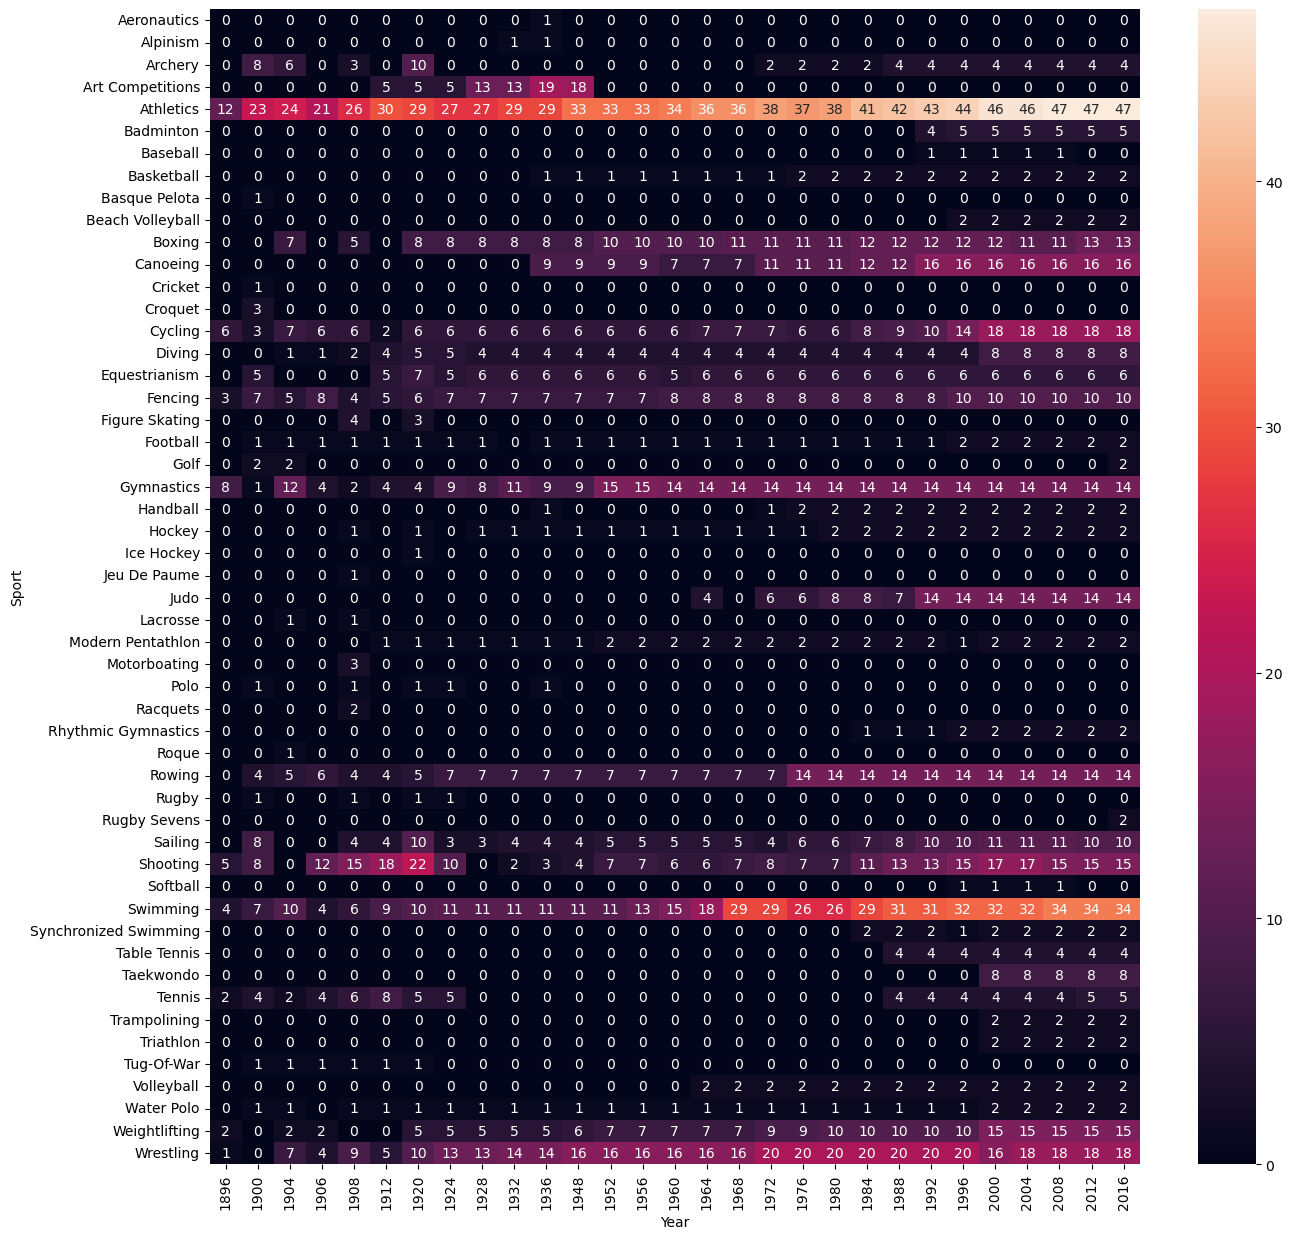

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [55]:
def most_successfull(df,sport):
    temp_df=df.dropna(subset=['Medal'])
    if sport !='Overall':
        temp_df=temp_df[temp_df['Sport']==sport]
    
    return temp_df['Name'].value_counts().reset_index().head(15)

In [56]:
most_successfull (df,'Overall')

Name  count
0                           Michael Fred Phelps, II     28
1                Larysa Semenivna Latynina (Diriy-)     18
2                      Nikolay Yefimovich Andrianov     15
3                       Borys Anfiyanovych Shakhlin     13
4                                       Takashi Ono     13
5                               Edoardo Mangiarotti     13
6              Dara Grace Torres (-Hoffman, -Minas)     12
7                           Aleksey Yuryevich Nemov     12
8   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
9                            Birgit Fischer-Schmidt     12
10                               Ryan Steven Lochte     12
11                             Paavo Johannes Nurmi     12
12                                       Sawao Kato     12
13                    Natalie Anne Coughlin (-Hall)     12
14                   Matthew Nicholas "Matt" Biondi     11

In [57]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_14780\1749264335.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
new_df=temp_df[temp_df['region']=='India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()
final_df

Year  Medal
0   1900      2
1   1928      1
2   1932      1
3   1936      1
4   1948      1
5   1952      2
6   1956      1
7   1960      1
8   1964      1
9   1968      1
10  1972      1
11  1980      1
12  1996      1
13  2000      1
14  2004      1
15  2008      3
16  2012      6
17  2016      2

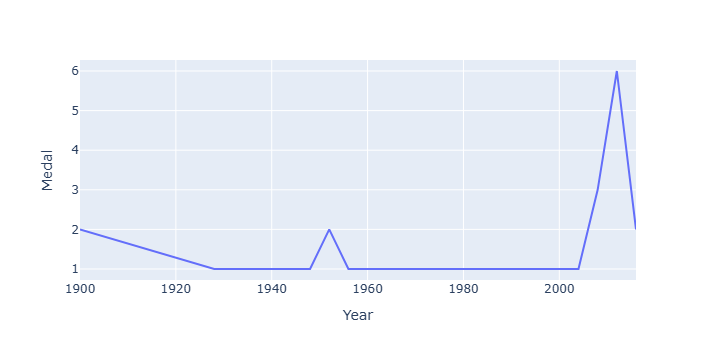

In [59]:
fig=px.line(final_df,x="Year",y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

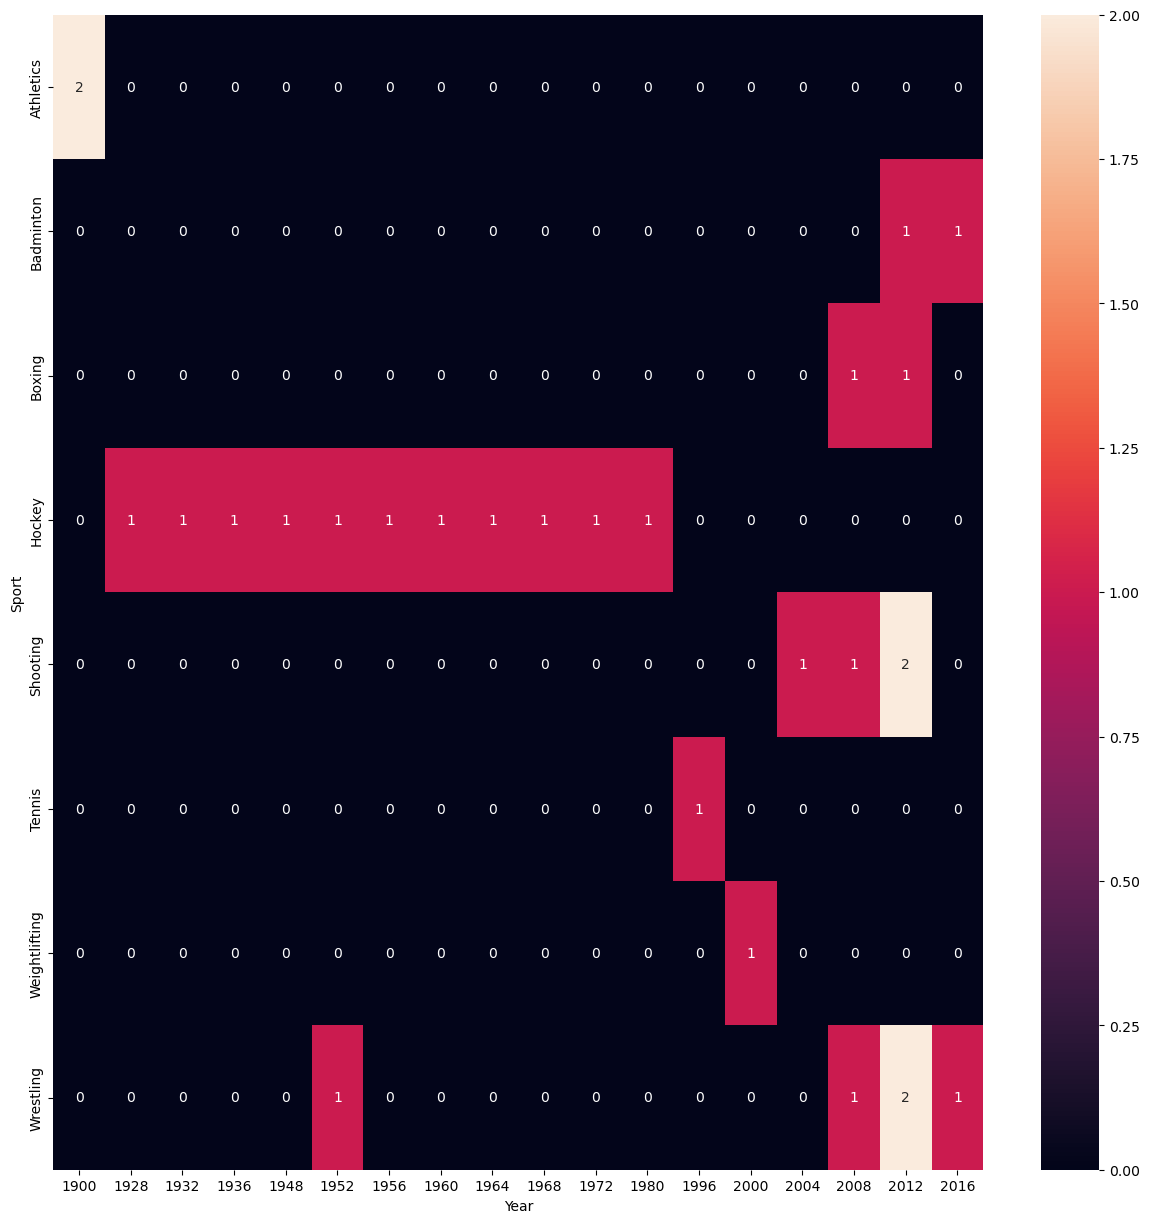

In [60]:
new_df=temp_df[temp_df['region']=='India']
plt.figure(figsize=(15,15))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [61]:
def most_successfull(df,country):
    temp_df=df.dropna(subset=['Medal'])
    temp_df=temp_df[temp_df['region']==country]
    
    return temp_df['Name'].value_counts().reset_index().head(15)

In [62]:
most_successfull(df,'USA')

Name  count
0                           Michael Fred Phelps, II     28
1                                Ryan Steven Lochte     12
2   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
3                     Natalie Anne Coughlin (-Hall)     12
4              Dara Grace Torres (-Hoffman, -Minas)     12
5                    Matthew Nicholas "Matt" Biondi     11
6                              Carl Townsend Osburn     11
7                                 Mark Andrew Spitz     11
8                       Raymond Clarence "Ray" Ewry     10
9                    Frederick Carlton "Carl" Lewis     10
10                             Gary Wayne Hall, Jr.     10
11                           Allyson Michelle Felix      9
12                           Martin Joseph Sheridan      9
13                        Shirley Frances Babashoff      9
14                           Nathan Ghar-Jun Adrian      8

In [63]:
import plotly.figure_factory as ff

In [64]:
athlete_df=df.drop_duplicates(subset=['Name','region'])
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222544       Russia   NaN    True  False   False  
222546    Argentina   NaN   False  False   False  
222548          USA   NaN   False  False   False  
222549       Russia   NaN   False  False   False  
222551      Belarus   NaN   False  False   False  

[116885 rows x 20 columns]

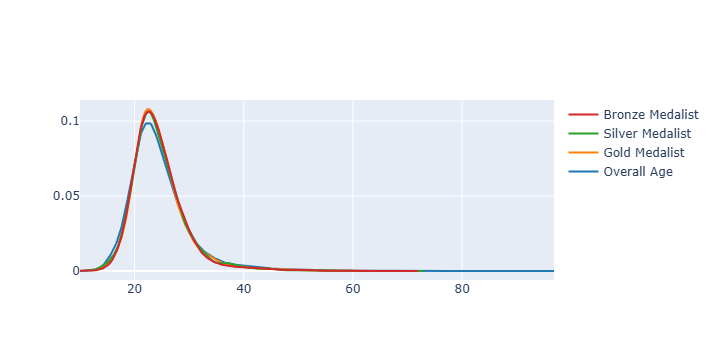

In [65]:
athlete_df['Age']#there are many missing values in this col
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [66]:
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222544       Russia   NaN    True  False   False  
222546    Argentina   NaN   False  False   False  
222548          USA   NaN   False  False   False  
222549       Russia   NaN   False  False   False  
222551      Belarus   NaN   False  False   False  

[116885 rows x 20 columns]

In [67]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_14780\4160890072.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

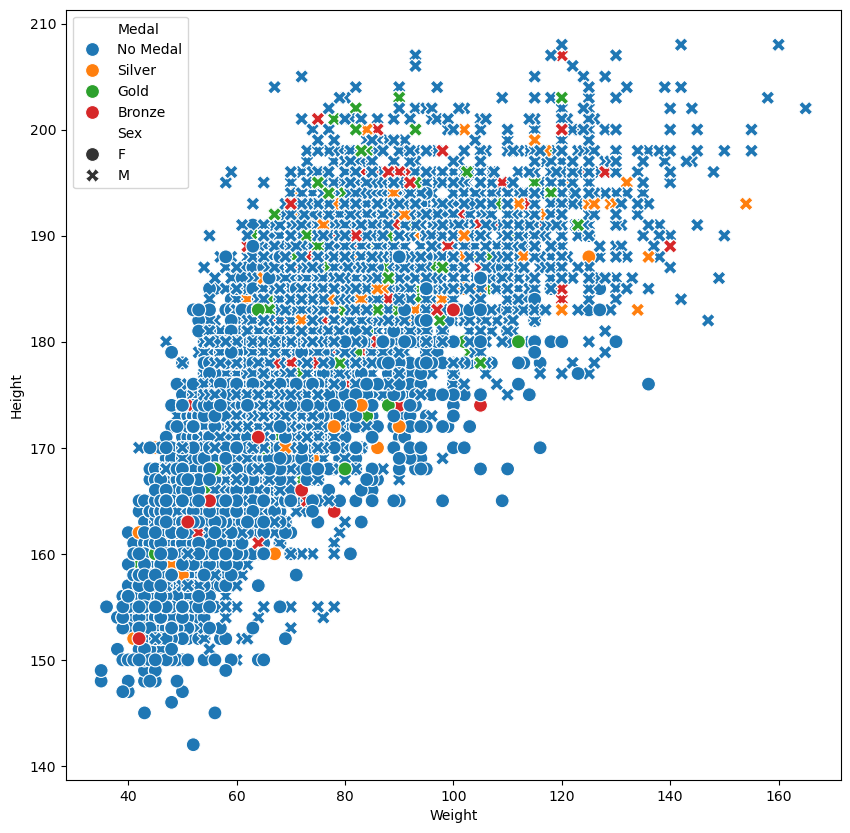

In [68]:
import seaborn as sns
plt.figure(figsize=(10,10))
temp_df=athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(x='Weight',y='Height',data=temp_df,hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

In [73]:
men=athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()

In [74]:
men

Year  Name
0   1896   174
1   1900  1181
2   1904   629
3   1906   759
4   1908  1772
5   1912  1978
6   1920  2280
7   1924  2535
8   1928  2342
9   1932  1382
10  1936  3539
11  1948  3629
12  1952  3468
13  1956  2193
14  1960  3755
15  1964  3290
16  1968  3555
17  1972  4552
18  1976  3320
19  1980  3151
20  1984  4299
21  1988  4704
22  1992  4769
23  1996  4811
24  2000  4294
25  2004  3931
26  2008  3990
27  2012  3679
28  2016  4022

In [75]:
women=athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()
women

Year  Name
0   1900    23
1   1904     6
2   1906     6
3   1908    44
4   1912    53
5   1920    73
6   1924   132
7   1928   285
8   1932   162
9   1936   316
10  1948   420
11  1952   409
12  1956   288
13  1960   473
14  1964   507
15  1968   599
16  1972   818
17  1976  1028
18  1980   875
19  1984  1368
20  1988  1734
21  1992  2080
22  1996  2518
23  2000  2790
24  2004  2820
25  2008  2947
26  2012  2919
27  2016  3209

In [84]:
f= men. merge (women,on='Year',how='left')
f.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
f.fillna(0,inplace=True)
f

Year  Male  Female
0   1896   174     0.0
1   1900  1181    23.0
2   1904   629     6.0
3   1906   759     6.0
4   1908  1772    44.0
5   1912  1978    53.0
6   1920  2280    73.0
7   1924  2535   132.0
8   1928  2342   285.0
9   1932  1382   162.0
10  1936  3539   316.0
11  1948  3629   420.0
12  1952  3468   409.0
13  1956  2193   288.0
14  1960  3755   473.0
15  1964  3290   507.0
16  1968  3555   599.0
17  1972  4552   818.0
18  1976  3320  1028.0
19  1980  3151   875.0
20  1984  4299  1368.0
21  1988  4704  1734.0
22  1992  4769  2080.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2947.0
27  2012  3679  2919.0
28  2016  4022  3209.0

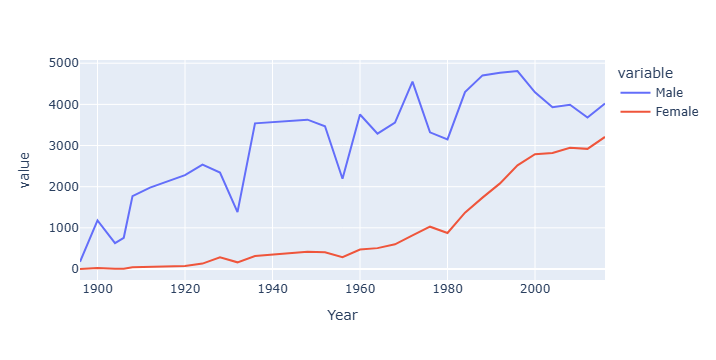

In [85]:
fig=px.line(f,x="Year",y=["Male","Female"])
fig.show()